## Deliverable Draft

## 0 - sample library 

### 0.0 - pulling data from the city of boston (cob)

In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#parameters: none
#returns: a dictionary, with plaintext keys corresponding to the resource ID
#notes: the resource ID is data.boston.gov 's internal identifier for datasets
def getSourceDict():
    sources = {"CRIMEINCIDENTREPORTS_2022": "313e56df-6d77-49d2-9c49-ee411f10cf58",
                "CRIMEINCIDENTREPORTS_2021": "f4495ee9-c42c-4019-82c1-d067f07e45d2",
                "CRIMEINCIDENTREPORTS_2020": "be047094-85fe-4104-a480-4fa3d03f9623",
                "CRIMEINCIDENTREPORTS_2019": "34e0ae6b-8c94-4998-ae9e-1b51551fe9ba",
                "CRIMEINCIDENTREPORTS_2018": "e86f8e38-a23c-4c1a-8455-c8f94210a8f1",
                "SHOOTINGS": "313e56df-6d77-49d2-9c49-ee411f10cf58",
                "SHOTSFIRED": "e16705ca-49ce-4803-84c1-c9848aa63024",
                "FIELDINTERROGATION_2020": "64dd32d9-26f9-4275-9265-97fa3de7e22b",
                "FIELDINTERROGATION_2019": "03f33240-47c1-46f2-87ae-bcdabec092ad",
                "FIELDINTERROGATION_2016": "35f3fb8f-4a01-4242-9758-f664e7ead125",
                "FIREARM_RECOVERY": "a3d2260f-8a41-4e95-9134-d14711b0f954",
                "EARNINGS_2021": "ec5aaf93-1509-4641-9310-28e62e028457",
                "EARNINGS_2020": "e2e2c23a-6fc7-4456-8751-5321d8aa869b",
                "EARNINGS_2019": "3bdfe6dc-3a81-49ce-accc-22161e2f7e74",
                "EARNINGS_2018": "31358fd1-849a-48e0-8285-e813f6efbdf1",
                "EARNINGS_2017": "70129b87-bd4e-49bb-aa09-77644da73503",
                "EARNINGS_2016": "8368bd3d-3633-4927-8355-2a2f9811ab4f",
                "EARNINGS_2015": "2ff6343f-850d-46e7-98d1-aca79b619fd6",
                "EARNINGS_2014": "941c9de4-fb91-41bb-ad5a-43a35f5dc80f",
                "EARNINGS_2013": "fac6a421-72fb-4f85-b4ac-4aca1e32d94e",
                "EARNINGS_2012": "d96dd8ad-9396-484a-87af-4d15e9e2ccb2",
                "EARNINGS_2011": "a861eff8-facc-4372-9b2d-262c2887b19e",
                "CHECKBOOK_2022": "0a261d4e-3eec-4bac-bf72-b9a7aa77b033",
                "CHECKBOOK_2021": "32897eeb-d9ca-494f-93b1-991c50bcd6a6",
                "CHECKBOOK_2020": "c093700f-d78a-49de-a8fe-508ba834ff6f",
                "CHECKBOOK_2019": "38227f56-46ed-47fe-9e1c-5d2fce52908d",
                "CHECKBOOK_2018": "5d8e373f-29a0-472c-b39b-9aa249e86fd5",
                "CHECKBOOK_2017": "01a5c35c-19e3-419e-a8b5-cb623525b96d",
                "CHECKBOOK_2016": "ae5a15cc-8bd3-455d-8cbb-9221e07c1426",
                "CHECKBOOK_2015": "5714ab9f-52d3-4c41-b2a6-2700b41438fc",
                "CHECKBOOK_2014": "69eab395-07d3-41b8-a021-a0d314bd8046",
                "CHECKBOOK_2013": "c2bc5615-9478-4a9b-b71c-f63f6364e409",
                "CHECKBOOK_2012": "fd5c56a7-224f-41c4-a011-969b8aee457d"
                }
    return(sources)

#parameters: the plaintext name of the source you'd like to get the resource ID for
#returns: a string with the resource ID corresponding to your parameter
def sourcetorid(sourcename):
    rid = getSourceDict()[sourcename]
    return(rid)
#parameters: none
#returns: a list of all selectable sources in the source dictionary
def list_sources():
    sourcelist=[]
    q = getSourceDict()
    for key in q:
        sourcelist.append(key)
    return(sourcelist)
#parameters: the resource id, and an integer; n
#returns: the response from the database at resource id rid, including only the first n entries
#notes: resource id, int n -> json (results which are the first n)
def n_recent(rid, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"&limit="+str(n))
    return(r.json())

#parameters: the resource id, and a string; n
#returns: the response from the database at resource id rid, including only the entries which contain string n
#notes: resource id, string n -> json (results which are those which contain n)
def n_contained(rid, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"&q="+str(n))
    return(r.json())

#parameters: the resource id, an integer; and an integer; n
#returns: the response from the database at resource id rid, including only r entries after index n
#notes: resource id, int r (the number of results to return), int n (the starting index) -> json (results which start at n, go to n+r)
def n_skip(rid, r, n):
    r = requests.get("https://data.boston.gov/api/3/action/datastore_search?resource_id="+rid+"$top=",r,"&$skip=",n)
    return(r.json())
#parameters: a json returned by a request function such as n_recent, n_contained, and n_skip
#returns: the field names of the same json
#notes: request json -> list of fields in the result w/ types and names
def return_fields(returnedjson):
    field_dictionary = {}
    returnfields = returnedjson['result']['fields']
    # ***** VERY IMPORTANT: some years have nonstandard names with mixed cases, here we set them all to upper ******
    for x in range(0, len(returnfields)):
        field_dictionary[returnfields[x]['id'].upper()] = returnfields[x]['type']
        #field_dictionary[returnfields[x]['id'].replace(" ","_")] = returnfields[x]['type']
    return(field_dictionary)

#parameters: a json returned by a request function such as n_recent, n_contained, and n_skip
#returns: the same json, stripped of metadata
#notes: request result -> nice format to parse
def eat_result(eson):
    re = eson['result']['records']
    reproc = []
    # ***** VERY IMPORTANT: some years have nonstandard names with mixed cases, here we set them all to upper ******
    for x in range(0, len(re)):
        standardized = {}
        for key in re[x].keys():
            standardized[key.upper()] = re[x][key]
        reproc.append(standardized)
    re=reproc
    return(re)


### 0.1 - processing data from the city of boston (cob)

In [3]:
#parameters: the output of a request that has been stripped of metadata via the function eat_result, those fields
#returns: the same json, cleaned of problematic characters, converted to the proper type, etc
#notes: request result -> eat_result() -> output -> cleanthecob() -> format which is both nice & parse-safe
#notes cont: in an ideal world
def cleanthecob(a, afields):
    print("Cleaning... expect debug messages...")
    #characters which ALWAYS cause problems
    badchars = ["$",",","(",")","'",'"']
    #characters which are used in place of zeros often
    zerochars = ["None"]
    for row in range(0, len(a)):
        for column in a[row]:
            
            if(a[row][column] is None):
                a[row][column] = "0"
                
            a[row][column]=str(a[row][column])
            
            for bad in badchars:
                if(afields[column]=='int'):
                    a[row][column]=a[row][column].replace(bad, "")
    
                elif(afields[column]=='text'):
                     a[row][column]=a[row][column].replace(bad, " ")

            if(afields[column]=='int'):
                #print(row)
                a[row][column]=a[row][column].replace("None", "0")
                a[row][column]=a[row][column].replace("-", "0")
                try:
                    a[row][column]=float(a[row][column])
                except Exception as e:
                    print("Row: ", str(row))
                    print("Column: ", str(column))
                    print(e)
                    print("Value: ", a[row][column])
                    print("Rewriting as -1.0")
                    a[row][column]= 0
                    
                
    return(a)

def scatterplot(our_cleaned_dataframe, xname, yname, hname, title):
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=45)
    #plt.tick_params(axis='y', which='major', labelsize=__)
    sns.set(rc = {'figure.figsize':(100,100)})
    sns.set(font_scale = 10)
    plt.tick_params(axis='y', labelsize="xx-small", pad=40)
    plt.tick_params(axis='x', labelsize="xx-small", pad=40)
    #plt.invert_yaxis()
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    hcon=sns.color_palette("mako", as_cmap=True)
    sns.scatterplot(data=our_cleaned_dataframe, x=xname, y=yname, hue=hname,legend = False, s=350, palette=hcon)
    plt.title(title, fontsize=200)
        

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

#parameters: the output of a cleaned request
#returns: that same output, stored in a pandas dataframe
#notes: request result -> eat_result() -> output -> cleanthecob() -> format which is both nice & parse-safe -> cobtopandas()
def cobtopandas(a):
    pass

#parameters: a pandas formatted cob dataset
#returns: true or false, whether the save was succesful or not
#notes: output of cobtopandas() -> pandastocsv()
def pandacobtocsv(a):
    pass




## 0.2 - unit testing

In [4]:
#this is a unit testing method to ensure we're cleaning the earnings correctly. 
#although the city provides fairly clean data, there are some inconsistencies, including irregular names, rows,
#field types, notations, etc.
def bench_clean():
    years = ["EARNINGS_2021", "EARNINGS_2020", 
             "EARNINGS_2019", "EARNINGS_2018", 
             "EARNINGS_2017", "EARNINGS_2016",
             "EARNINGS_2015", "EARNINGS_2014",
             "EARNINGS_2013", "EARNINGS_2012",
             "EARNINGS_2011"]
    for year in years:
    #specifying the number of entries
    #using 100000 to get all of the entries, if there are less than n it only returns what there is
        n = 200
        #selecting the database
        selected=year
        print(selected)
        #converting the source name to a resource ID
        rid = sourcetorid(selected)
        #getting the field names
        rid_fields = return_fields(n_recent(rid, 1))
        rid_names = rid_fields.keys()
        #stripping the result of metadata
        re = eat_result(n_recent(rid, n))
        rid_fields['REGULAR']='int'
        rid_fields['OVERTIME']='int'
        rid_fields['RETRO']='int'
        rid_fields['OTHER']='int'
        rid_fields['INJURED']='int'
        rid_fields['DETAIL']='int'
    
        #cleaning the text
        cleanre = cleanthecob(re, rid_fields)
        print(rid_fields)
        #cleanre=re
        our_dataframe = pd.DataFrame(data=cleanre[1:len(cleanre)], columns=rid_fields)
        print(our_dataframe.head())
        print(np.mean(our_dataframe["REGULAR"]))
        #scatterplot(our_dataframe, "REGULAR", "DEPARTMENT_NAME")
bench_clean()

EARNINGS_2021
Cleaning... expect debug messages...
{'_ID': 'int', 'NAME': 'text', 'DEPARTMENT_NAME': 'text', 'TITLE': 'text', 'REGULAR': 'int', 'RETRO': 'int', 'OTHER': 'int', 'OVERTIME': 'int', 'INJURED': 'int', 'DETAIL': 'int', 'QUINN_EDUCATION_INCENTIVE': 'text', 'TOTAL_GROSS': 'text', 'POSTAL': 'text'}
   _ID                   NAME           DEPARTMENT_NAME  \
0  2.0  McGowan Jacqueline M.  Boston Police Department   
1  3.0         Harris Shawn N  Boston Police Department   
2  4.0      Washington Walter  Boston Police Department   
3  5.0      Mosley Jr. Curtis  Boston Police Department   
4  6.0        Joseph Martin M  Boston Police Department   

                            TITLE    REGULAR  RETRO       OTHER  OVERTIME  \
0                  Police Officer       0.00    0.0  1252990.81      0.00   
1  Police Offc Comm Serv Offc 3 8   69772.10    0.0   212739.48  82300.87   
2                  Police Officer  100963.38    0.0   211900.28  67849.66   
3  Police Offc Comm Serv Offc

Cleaning... expect debug messages...
{'_ID': 'int', 'NAME': 'text', 'DEPARTMENT_NAME': 'text', 'TITLE': 'text', 'REGULAR': 'int', 'RETRO': 'int', 'OTHER': 'int', 'OVERTIME': 'int', 'INJURED': 'int', 'DETAILS': 'text', 'QUINN/EDUCATION INCENTIVE': 'text', 'TOTAL EARNINGS': 'text', 'POSTAL': 'text', 'DETAIL': 'int'}
   _ID                     NAME               DEPARTMENT_NAME  \
0  2.0         Abasciano Joseph      Boston Police Department   
1  3.0   Abban Christopher John        Boston Fire Department   
2  4.0  Abbate-Vaughn Jorgelina          BPS Ellis Elementary   
3  5.0         Abberton James P       Public Works Department   
4  6.0           Abbott John R.  BPS Snowden International Hi   

                      TITLE    REGULAR  RETRO    OTHER  OVERTIME   INJURED  \
0            Police Officer     886.20    0.0  8088.35    544.83  81996.78   
1              Fire Fighter  101468.29    0.0   550.00  15146.51      0.00   
2                   Teacher   42919.31    0.0     0.00     

## 1 - usage of sample library

Cleaning... expect debug messages...
{'_ID': 'int', 'NAME': 'text', 'DEPARTMENT_NAME': 'text', 'TITLE': 'text', 'REGULAR': 'int', 'RETRO': 'int', 'OTHER': 'int', 'OVERTIME': 'int', 'INJURED': 'int', 'DETAIL': 'int', 'QUINN/EDUCATION INCENTIVE': 'text', 'TOTAL EARNINGS': 'text', 'POSTAL': 'text'}


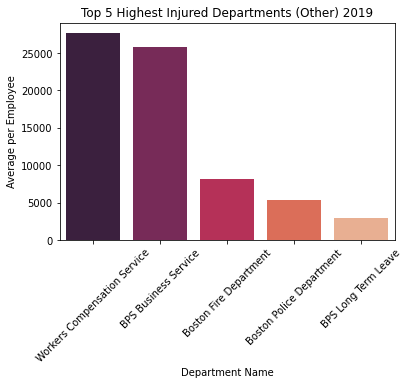

In [5]:


import numpy as np
import pandas as pd
#specifying the number of entries
#using 100000 to get all of the entries, if there are less than n it only returns what there is
n = 100000
#selecting the database
selected="EARNINGS_2019"
#converting the source name to a resource ID
rid = sourcetorid(selected)
#getting the field names
rid_fields = return_fields(n_recent(rid, 1))
rid_names = rid_fields.keys()
#stripping the result of metadata
re = eat_result(n_recent(rid, n))
rid_fields['REGULAR']='int'
rid_fields['OVERTIME']='int'
rid_fields['RETRO']='int'
rid_fields['OTHER']='int'
rid_fields['INJURED']='int'
rid_fields['DETAIL']='int'

#cleaning the text
cleanre = cleanthecob(re, rid_fields)
print(rid_fields)
#cleanre=re
our_dataframe = pd.DataFrame(data=cleanre[1:len(cleanre)], columns=rid_fields)


#print(np.var(our_dataframe["REGULAR"]))
#cops = our_dataframe.loc[our_dataframe['DEPARTMENT_NAME']== "Boston Police Department"]
#scatterplot(cops, "REGULAR", "OVERTIME", "OVERTIME", "OVERTIME PAYMENT BY REGULAR PAY RECEIVED")
summationdict = {}
countdict = {}
avgdict = {}
for x in range(0, len(our_dataframe)):
    #print(our_dataframe["DEPARTMENT_NAME"][x])
    if(our_dataframe["DEPARTMENT_NAME"][x] not in summationdict):
        summationdict[our_dataframe["DEPARTMENT_NAME"][x]] = our_dataframe["INJURED"][x]
        countdict[our_dataframe["DEPARTMENT_NAME"][x]] = 1
    elif(our_dataframe["DEPARTMENT_NAME"][x] in summationdict):
        summationdict[our_dataframe["DEPARTMENT_NAME"][x]]+= our_dataframe["INJURED"][x]
        countdict[our_dataframe["DEPARTMENT_NAME"][x]]+=1

for key in summationdict.keys():
    avgdict[key]=summationdict[key]/countdict[key]
    
sumov=pd.DataFrame(summationdict.items(), columns=['Department Name', 'Summed Overtime'])
sumcount=pd.DataFrame(countdict.items(), columns=['Department Name', 'Employees'])
avgdict = pd.DataFrame(avgdict.items(), columns=['Department Name', 'Average per Employee'])

top5 = avgdict.nlargest(n=5, columns=["Average per Employee"])
sns.barplot(x="Department Name", y="Average per Employee", data=top5, palette="rocket")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title("Top 5 Highest Injured Departments (Other) 2019")
plt.show()

## ACLU Style Notes:

#### Off topic
- R GG plot is used at ACLU
- Email to get font files

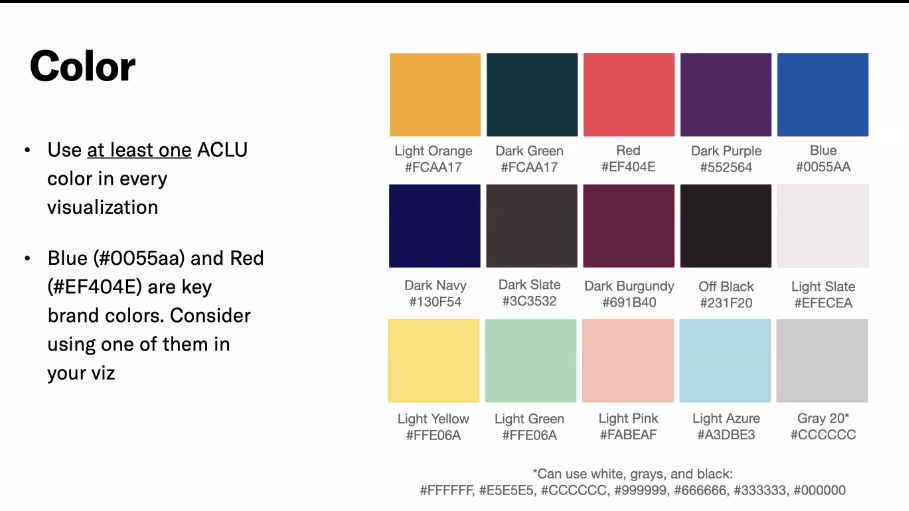

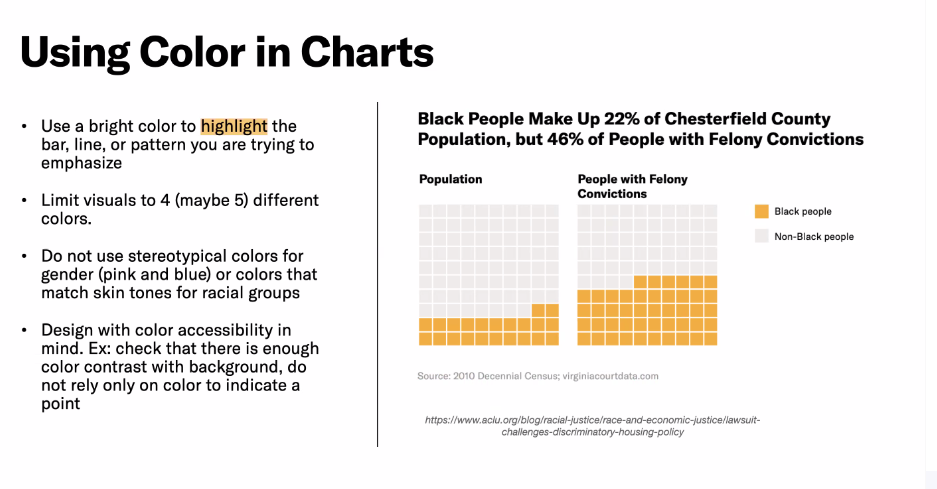

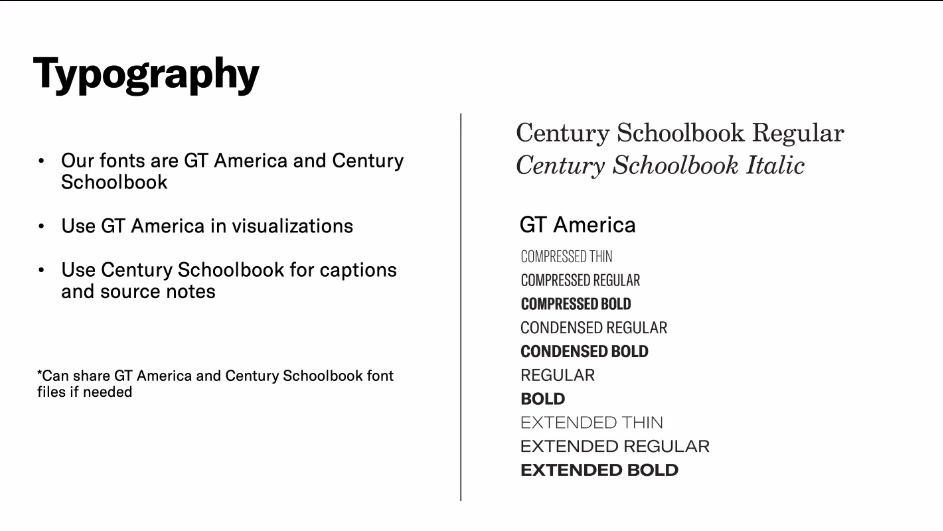

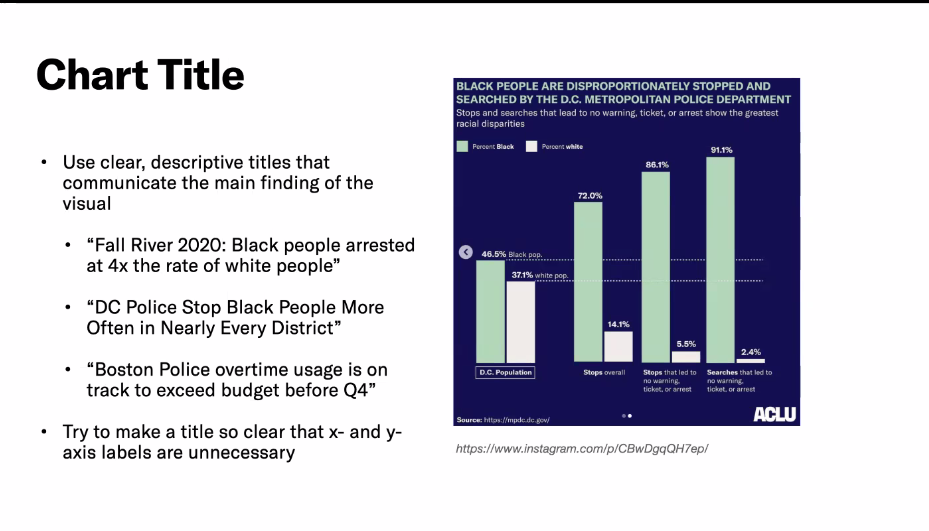

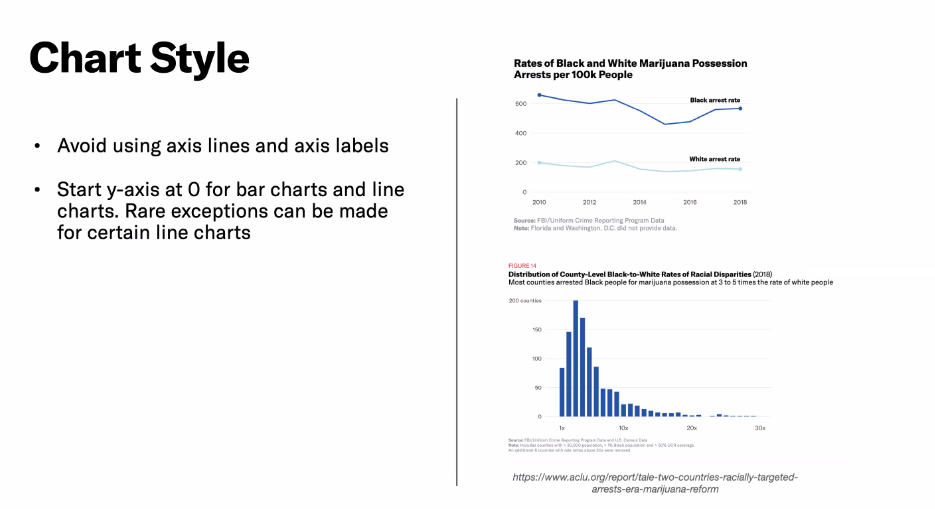

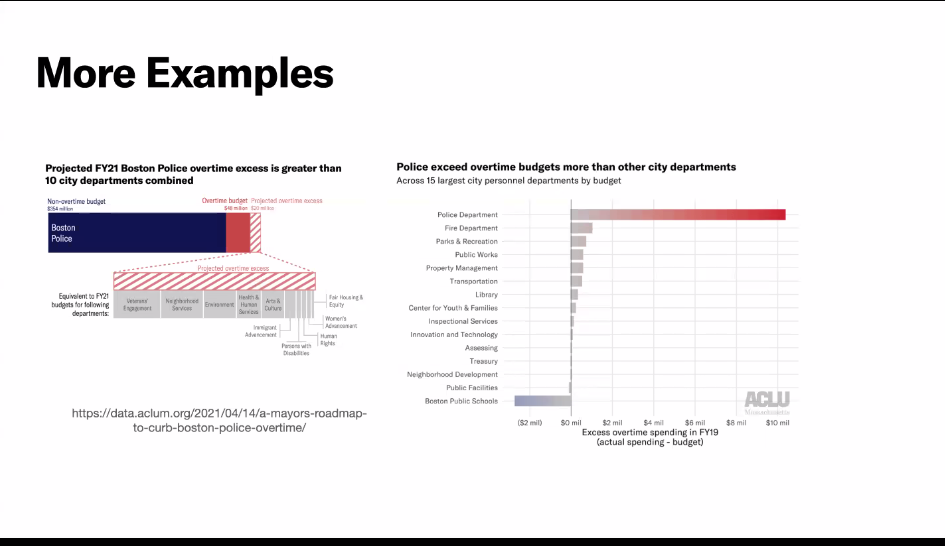

# Analysis

## Creating A Complete Dataset



While the API provides a much more comprehensive look into the data, including access to a few live sources, it is also network dependent. Let's create a complete .csv file that's precleaned.

*note: this is incredibly redundant code - do not use it to make your own dataset. an unknown amount of edge cases for 24,000 entries had to be accounted for quickly.*

In [28]:
import numpy as np
import pandas as pd


#specifying the number of entries
#using 100000 to get all of the entries, if there are less than n it only returns what there is
n = 100000
#selecting the databases
composeddf=pd.DataFrame()
for key in getSourceDict().keys():
    if("EARNINGS" in key):
        selected = key
        #converting the source name to a resource ID
        rid = sourcetorid(selected)
        #getting the field names
        rid_fields = return_fields(n_recent(rid, 1))
        rid_names = rid_fields.keys()
        #stripping the result of metadata
        re = eat_result(n_recent(rid, n))
        rid_fields['REGULAR']='int'
        rid_fields['OVERTIME']='int'
        rid_fields['RETRO']='int'
        rid_fields['OTHER']='int'
        rid_fields['INJURED']='int'
        rid_fields['DETAIL']='int'
        cleanre = cleanthecob(re, rid_fields)
        our_dataframe = pd.DataFrame(data=cleanre[1:len(cleanre)], columns=rid_fields)
        year_column = [int(selected.split("_")[1])]*our_dataframe.shape[0]
        our_dataframe = our_dataframe.assign(YEAR=year_column)
        #our_dataframe = our_dataframe.drop('_ID', axis=1)
        #there is variation in the names of identical fields across years - this fixes that
        for key in our_dataframe.keys():
            if("quinn" in key.lower()):
                our_dataframe=our_dataframe.rename(columns={key: "QUINN_EDUCATION"})
                our_dataframe["QUINN_EDUCATION"].replace({' ': ''}, regex=True, inplace=True)
                our_dataframe["QUINN_EDUCATION"].replace({'-': ' '}, regex=True, inplace=True)
                #our_dataframe["QUINN_EDUCATION"] = (our_dataframe["QUINN_EDUCATION"]).astype(float)
            if("total" in key.lower()):
                our_dataframe=our_dataframe.rename(columns={key: "TOTAL_EARNINGS"})
            if("department" in key.lower()):
                our_dataframe=our_dataframe.rename(columns={key: "DEPARTMENT_NAME"})
            if("zip" in key.lower() or 'postal' in key.lower()):
                our_dataframe=our_dataframe.rename(columns={key: "ZIPCODE"})
            if("detail" in key.lower()):
                our_dataframe["DETAIL_PAY"] = pd.to_numeric(our_dataframe[key])
        composeddf = pd.concat([composeddf,our_dataframe],ignore_index=True,verify_integrity=True)
        print(composeddf.shape)
#omposeddf["DETAIL_PAY"] = composeddf["DETAIL_PAY"]+(composeddf['DETAILS'])+composeddf['DETAIL']
composeddf=composeddf.drop(columns=['DETAILS', "DETAIL"])
#composeddf = composeddf.dropna(subset=['NAME'])
composeddf=composeddf[composeddf["NAME"].str.contains("0")==False]
composeddf.to_csv("bostonpaychecks.csv", sep='\t', encoding='utf-8')
numeric_columns = [  'REGULAR',
                     'RETRO',
                     'OTHER',
                     'OVERTIME',
                     'INJURED',
                     'QUINN_EDUCATION',
                     'TOTAL_EARNINGS',
                     'YEAR',
                     'DETAIL_PAY']
df = pd.read_csv('bostonpaychecks.csv',sep='\t', encoding='utf-8')
df.head(10)
for column_name in numeric_columns:
    df[column_name].replace({' ': ''}, regex=True, inplace=True)
    df[column_name].replace({'None': ''}, regex=True, inplace=True)
    df[column_name].replace(r'^\s*$', 0.0, regex=True, inplace=True)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    #df[column_name].replace({'-': '0'}, regex=True, inplace=True)
    df[column_name]=df[column_name].astype(float)
df.head(10)
df.to_csv("bostonpaychecks.csv", sep='\t', encoding='utf-8')

Cleaning... expect debug messages...
(22551, 15)
Cleaning... expect debug messages...
(44408, 15)
Cleaning... expect debug messages...
(67719, 15)
Cleaning... expect debug messages...
Row:  12563
Column:  INJURED
could not convert string to float: 'INJURED'
Value:  INJURED
Rewriting as -1.0
Row:  12563
Column:  DETAIL
could not convert string to float: 'DETAIL'
Value:  DETAIL
Rewriting as -1.0
Row:  12563
Column:  OTHER
could not convert string to float: 'OTHER'
Value:  OTHER
Rewriting as -1.0
Row:  12563
Column:  OVERTIME
could not convert string to float: 'OVERTIME'
Value:  OVERTIME
Rewriting as -1.0
Row:  12563
Column:  REGULAR
could not convert string to float: 'REGULAR'
Value:  REGULAR
Rewriting as -1.0
Row:  12563
Column:  RETRO
could not convert string to float: 'RETRO'
Value:  RETRO
Rewriting as -1.0
Row:  22131
Column:  INJURED
could not convert string to float: 'INJURED'
Value:  INJURED
Rewriting as -1.0
Row:  22131
Column:  DETAIL
could not convert string to float: 'DETAIL'


/tmp/ipykernel_308859/1660405208.py:60: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bostonpaychecks.csv',sep='\t', encoding='utf-8')


## Regular Payment

### Yearly Average

In [28]:
import numpy as np
import pandas as pd
#specifying the number of entries
#using 100000 to get all of the entries, if there are less than n it only returns what there is
n = 100000
#selecting the databases
composeddf=pd.DataFrame()
for key in getSourceDict().keys():
    if("EARNINGS" in key):
        selected = key
        #converting the source name to a resource ID
        rid = sourcetorid(selected)
        #getting the field names
        rid_fields = return_fields(n_recent(rid, 1))
        rid_names = rid_fields.keys()
        #stripping the result of metadata
        re = eat_result(n_recent(rid, n))
        rid_fields['REGULAR']='int'
        rid_fields['OVERTIME']='int'
        rid_fields['RETRO']='int'
        rid_fields['OTHER']='int'
        rid_fields['INJURED']='int'
        rid_fields['DETAIL']='int'
        cleanre = cleanthecob(re, rid_fields)
        our_dataframe = pd.DataFrame(data=cleanre[1:len(cleanre)], columns=rid_fields)
        year_column = [int(selected.split("_")[1])]*our_dataframe.shape[0]
        our_dataframe = our_dataframe.assign(YEAR=year_column)
        composeddf= pd.concat([composeddf,our_dataframe[['YEAR', 'REGULAR']]])
historical = composeddf


Cleaning... expect debug messages...
Cleaning... expect debug messages...
Cleaning... expect debug messages...
Cleaning... expect debug messages...
Row:  12563
Column:  INJURED
could not convert string to float: 'INJURED'
Value:  INJURED
Rewriting as -1.0
Row:  12563
Column:  DETAIL
could not convert string to float: 'DETAIL'
Value:  DETAIL
Rewriting as -1.0
Row:  12563
Column:  OTHER
could not convert string to float: 'OTHER'
Value:  OTHER
Rewriting as -1.0
Row:  12563
Column:  OVERTIME
could not convert string to float: 'OVERTIME'
Value:  OVERTIME
Rewriting as -1.0
Row:  12563
Column:  REGULAR
could not convert string to float: 'REGULAR'
Value:  REGULAR
Rewriting as -1.0
Row:  12563
Column:  RETRO
could not convert string to float: 'RETRO'
Value:  RETRO
Rewriting as -1.0
Row:  22131
Column:  INJURED
could not convert string to float: 'INJURED'
Value:  INJURED
Rewriting as -1.0
Row:  22131
Column:  DETAIL
could not convert string to float: 'DETAIL'
Value:  DETAIL
Rewriting as -1.0
Row

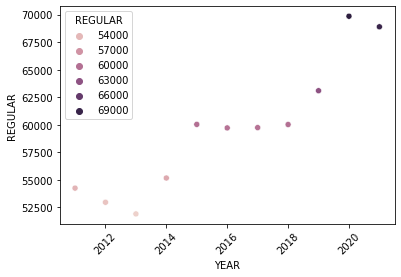

In [45]:
yearly_mean = historical.groupby(historical["YEAR"]).mean()
sns.scatterplot(x="YEAR", y="REGULAR",data = yearly_mean, hue="REGULAR")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

### Department Representation in top n percent

## Overtime Payment

### Yearly Average

### Department Representation in top n percent